In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import re
import argparse

os.sys.path.append('../code/utils/')
import flowlib

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
# rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
# rc('mathtext',**{'default':'regular'})

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# params = {
#    'axes.labelsize': 8,
#    'text.fontsize': 8,
#    'legend.fontsize': 10,
#    'xtick.labelsize': 10,
#    'ytick.labelsize': 10,
#    'text.usetex': False,
#    'figure.figsize': [10., 4.] # instead of 4.5, 4.5
#    }
# plt.rcParams.update(params)

plt.rcParams['figure.figsize'] = (10.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap']='gray'

maxIter = 50

In [2]:
dData = '../result/base/'
fList = [f for f in os.listdir(dData) if f.endswith('npy')]

##############################
# parsing arguments to be used in output file name
##############################
parser = argparse.ArgumentParser(description='optical flow')
parser.add_argument('-m','--model', type=str, default='hs', help='motion: hs, tvl1, hl1')
parser.add_argument('--seq', type=int, default=4, help='sequence number in middlebury(0~7)')
parser.add_argument('-n', '--niter', type=int, default='20', help='iteration number')
parser.add_argument('-p', '--pyramid', type=int, default='2', help='number of scales in pyramid')

parser.add_argument('-t', '--tau', type=float, default='0.25', help='step size in Chambolle-Pock')
parser.add_argument('--lambd', type=float, default='0.9', help='constant lambda')

_StoreAction(option_strings=['--lambd'], dest='lambd', nargs=None, const=None, default='0.9', type=<class 'float'>, choices=None, help='constant lambda', metavar=None)

In [3]:
def load_result(**kwargs):
    """
    load one result for given parameter

    Usage:
    >>> res = load_result(opt='sgd', lr=0.05, batchSize=32, dropout=0)
    """
    for f in fList:
        params = f.split('_')
        args, temp = parser.parse_known_args(params)
        dic = vars(args)

        bFind = True
        for key in kwargs:
            if dic[key] != kwargs[key]:
                bFind = False
                break
            
        if bFind == True:
            print(args)
            res = np.load(dData+f)
            return res, args
          
class GResult(object):
    """
    generator of varying hyper-parameters
    
    Usage:
    >>> gr = GResult()
    >>> for res, args in gr.generate(opt='sgd'):
    >>>     ...
    """
    def generate(self, **kwargs):
        for f in fList:
            params = f.split('_')
            args, temp = parser.parse_known_args(params)
            dic = vars(args)
            
            bFind = True
            for key in kwargs:
                if dic[key] != kwargs[key]:
                    bFind = False
                    break
                
            if bFind == True:
                res = np.load(dData+f)        
                yield res, args

In [4]:
class PltResults(object):
    """
    plot accuracies of many examples
    """
    def __init__(self, viewLoss=True, viewAcc=True):
        self.cnt = 0
        self.leg = []
        
        plt.figure(1)
        plt.ylabel('test loss')
        plt.xlabel('epoch')
        plt.grid(True, linestyle='--', linewidth=0.4)
        
        plt.figure(2)
        plt.ylabel('accuracy error(%)')
        plt.ylim([0., 0.05])
        plt.xlabel('epoch')
        plt.grid(True, linestyle='--', linewidth=0.4)
        
        self.viewLoss = viewLoss
        self.viewAcc = viewAcc
                
    def plot(self, res):
        self.cnt += 1

        if self.cnt < 6:
            self.leg += str(self.cnt)
        
        if self.viewLoss:
            plt.figure(1)
            plt.plot(res[1], '-')
            plt.legend(self.leg)
            
        if self.viewAcc:
            plt.figure(2)
            plt.plot(res[2], '-')

            plt.legend(self.leg)

In [5]:
seq_list = ['Dimetrodon','Grove2','Grove3','Hydrangea',
            'RubberWhale','Urban2','Urban3','Venus']
# HuberL1 result in Werlberger's thesis
# 0.186, 0.217, 0.625, 0.235,
# 0.149, 0.370, 0.485

In [6]:
res, args = load_result()

Namespace(lambd=0.1, model='hs', niter=2000, pyramid=3, seq=2, tau=0.25)


## Find best ape

In [7]:
gr = GResult()

for seq_ in range(8):
    min_ape = 5555
    for res, args in gr.generate(seq=seq_):
        if min_ape > res[2] and res[2]>=0:
            min_ape = res[2]
            print(args, min_ape)
            
    print('seq: %d, min_ape: %f' % (seq_, min_ape))

Namespace(lambd=1024.0, model='hl1', niter=2000, pyramid=3, seq=0, tau=0.25) 8.54098282303
Namespace(lambd=256.0, model='tvl1', niter=2000, pyramid=3, seq=0, tau=0.25) 5.65583532325
Namespace(lambd=16.0, model='hs', niter=2000, pyramid=3, seq=0, tau=0.25) 1.40860789813
Namespace(lambd=1.0, model='hl1', niter=2000, pyramid=3, seq=0, tau=0.25) 1.40055885377
Namespace(lambd=16.0, model='tvl1', niter=2000, pyramid=3, seq=0, tau=0.25) 1.39361146072
Namespace(lambd=0.1, model='hs', niter=2000, pyramid=3, seq=0, tau=0.25) 1.3907204924
seq: 0, min_ape: 1.390720
Namespace(lambd=0.1, model='hs', niter=2000, pyramid=3, seq=1, tau=0.25) 1.85338911944
seq: 1, min_ape: 1.853389
Namespace(lambd=0.1, model='hs', niter=2000, pyramid=3, seq=2, tau=0.25) 2.67831100058
Namespace(lambd=0.25, model='hs', niter=2000, pyramid=3, seq=2, tau=0.25) 2.35054700287
Namespace(lambd=1.0, model='hs', niter=2000, pyramid=3, seq=2, tau=0.25) 1.94224359054
Namespace(lambd=4.0, model='tvl1', niter=2000, pyramid=3, seq=2, 

## See flow images

max flow: 432.9227
flow range:
u = -348.348 .. 432.878
v = -323.612 .. 268.647
Namespace(lambd=1024.0, model='hl1', niter=2000, pyramid=3, seq=0, tau=0.25)
8.54098282303


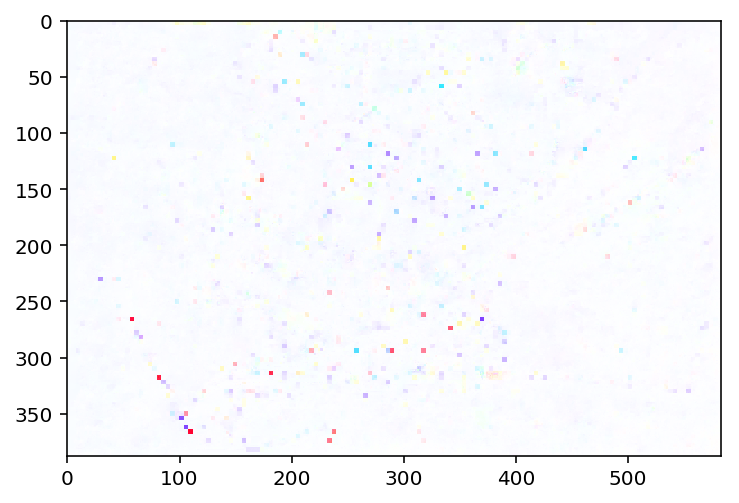

max flow: 4.1177
flow range:
u = -4.079 .. -1.966
v = -2.169 .. 0.126
Namespace(lambd=0.1, model='hl1', niter=2000, pyramid=3, seq=0, tau=0.25)
1.42699809844


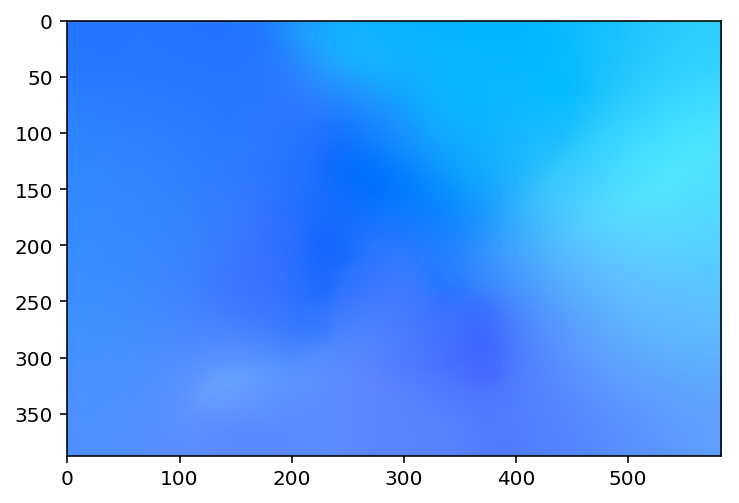

max flow: 5.8283
flow range:
u = -5.418 .. -1.479
v = -3.565 .. 1.931
Namespace(lambd=16.0, model='hl1', niter=2000, pyramid=3, seq=0, tau=0.25)
1.42294318699


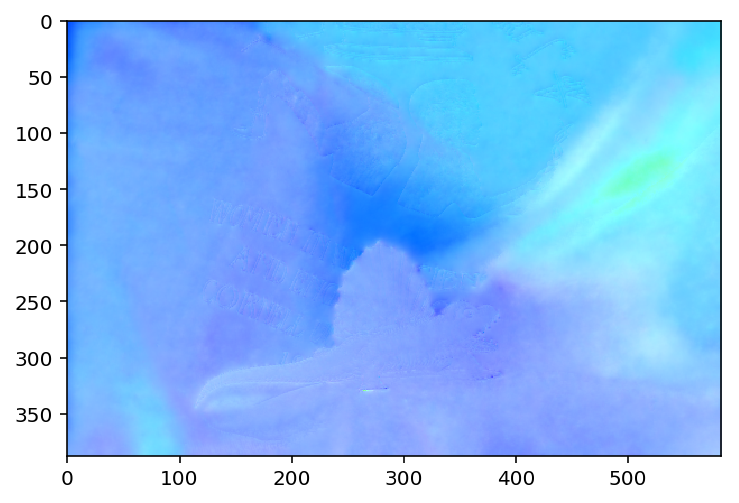

max flow: 4.9005
flow range:
u = -4.444 .. -1.799
v = -2.433 .. 0.800
Namespace(lambd=1.0, model='hl1', niter=2000, pyramid=3, seq=0, tau=0.25)
1.40055885377


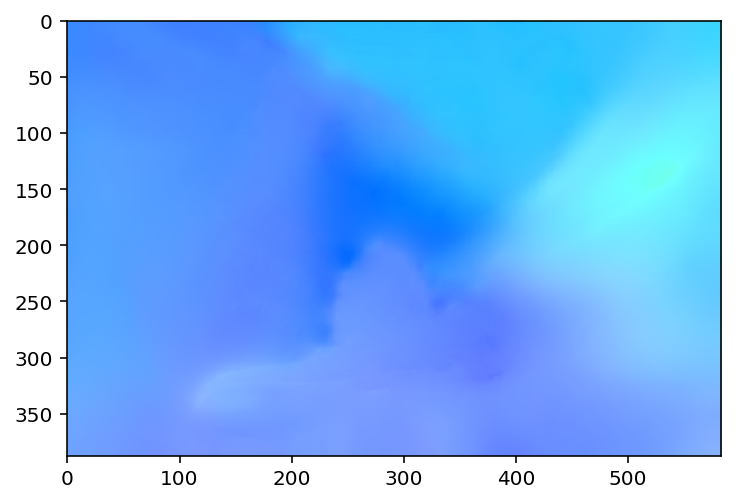

max flow: 4.5703
flow range:
u = -4.167 .. -1.898
v = -2.224 .. 0.455
Namespace(lambd=0.25, model='hl1', niter=2000, pyramid=3, seq=0, tau=0.25)
1.39762411613


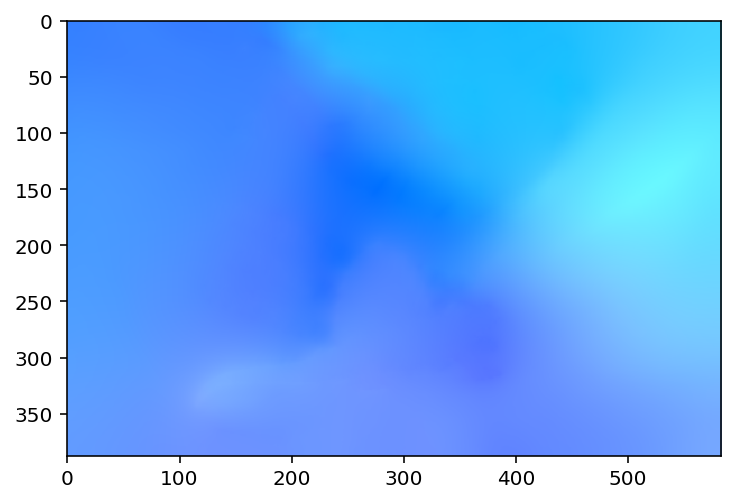

seq: 0, min_ape: 1.397624
seq: 1, min_ape: 5555.000000
max flow: 7.3185
flow range:
u = -3.192 .. 6.639
v = -4.781 .. 3.346
Namespace(lambd=0.25, model='hl1', niter=2000, pyramid=3, seq=2, tau=0.25)
1.89927471068


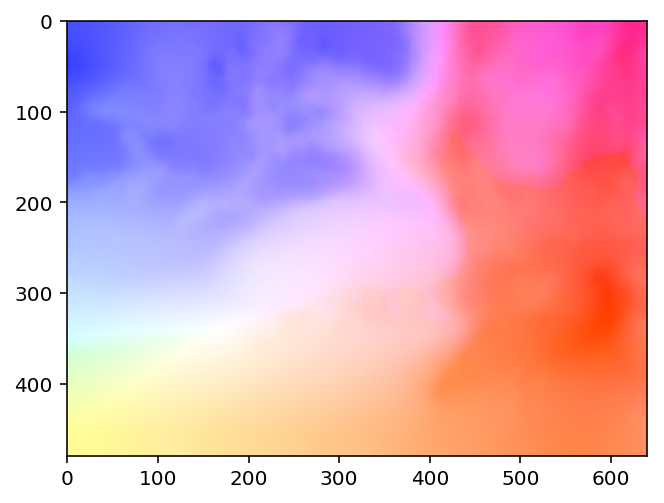

max flow: 8.0976
flow range:
u = -3.548 .. 7.590
v = -5.256 .. 4.015
Namespace(lambd=1.0, model='hl1', niter=2000, pyramid=3, seq=2, tau=0.25)
1.81883413609


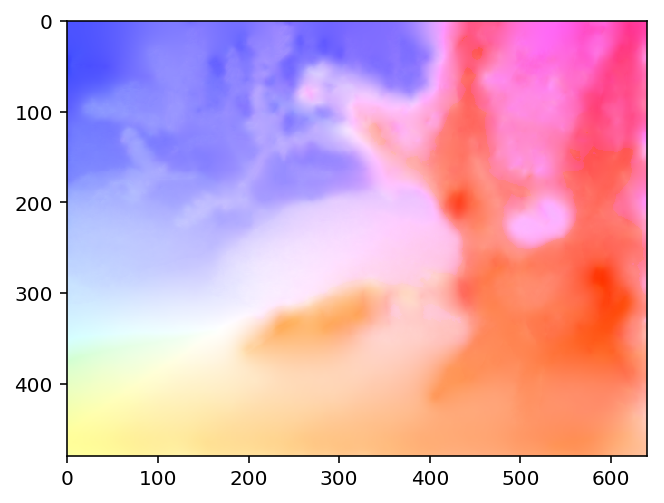

seq: 2, min_ape: 1.818834
seq: 3, min_ape: 5555.000000
max flow: 45.0982
flow range:
u = -5.065 .. 1.947
v = -3.842 .. 45.080
Namespace(lambd=16.0, model='hl1', niter=2000, pyramid=3, seq=4, tau=0.25)
1.45904058921


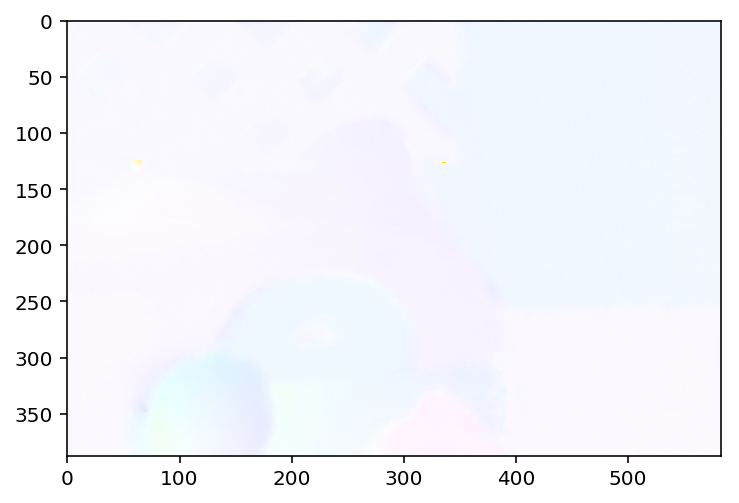

seq: 4, min_ape: 1.459041
seq: 5, min_ape: 5555.000000
max flow: 204.2464
flow range:
u = -57.792 .. 204.246
v = -17.749 .. 31.894
Namespace(lambd=16.0, model='hl1', niter=2000, pyramid=3, seq=6, tau=0.25)
2.96530110623


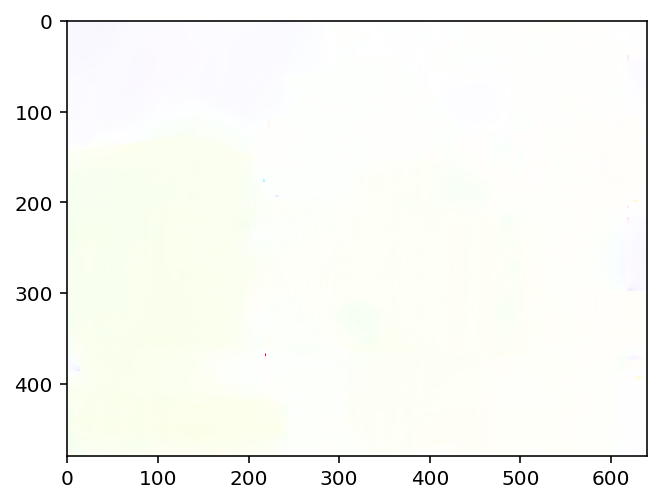

max flow: 16.5080
flow range:
u = -6.124 .. 0.864
v = -0.608 .. 15.920
Namespace(lambd=1.0, model='hl1', niter=2000, pyramid=3, seq=6, tau=0.25)
2.954559908


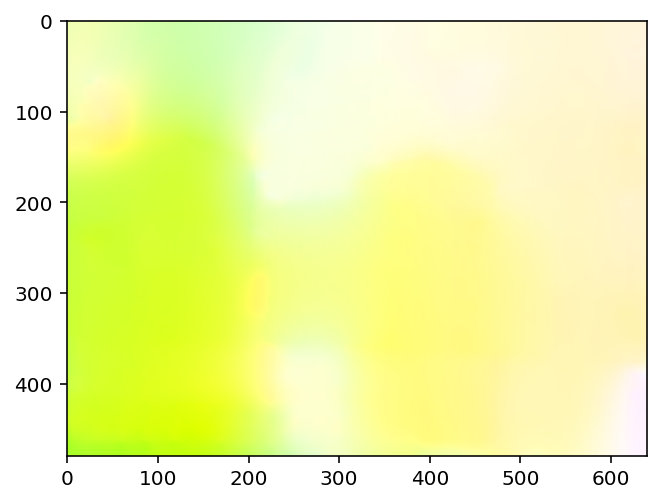

max flow: 16.7334
flow range:
u = -6.000 .. 2.115
v = -3.074 .. 16.170
Namespace(lambd=4.0, model='hl1', niter=2000, pyramid=3, seq=6, tau=0.25)
2.54045466286


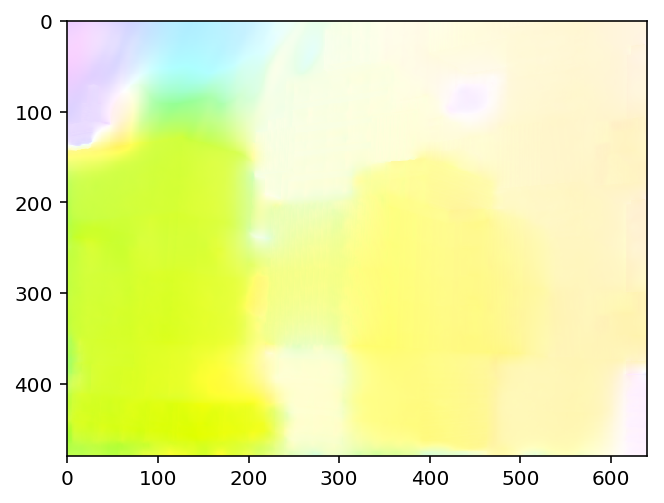

seq: 6, min_ape: 2.540455
max flow: 7.9386
flow range:
u = -7.908 .. 3.478
v = -1.556 .. -0.671
Namespace(lambd=0.1, model='hl1', niter=2000, pyramid=3, seq=7, tau=0.25)
2.70256972452


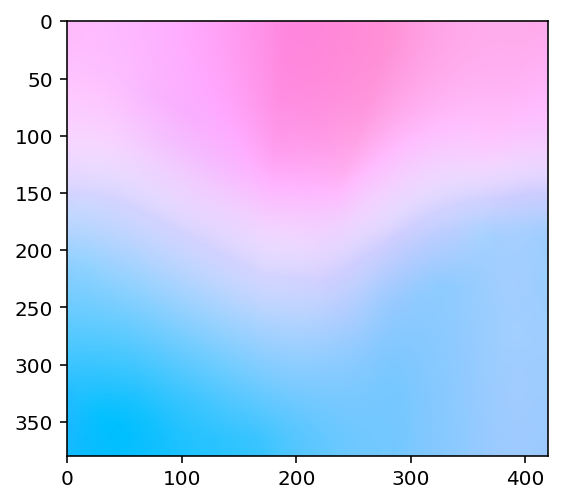

seq: 7, min_ape: 2.702570


In [8]:
gr = GResult()

for seq_ in range(8):
    min_ape = 5555
    for res, args in gr.generate(seq=seq_, model='hl1'):
        if min_ape > res[2] and res[2]>=0:
            img = flowlib.flow_to_image(res[0],res[1])
            
            print(args)
            print(res[2])
            min_ape = res[2]
            plt.imshow(img)
            plt.show()
                        
    print('seq: %d, min_ape: %f' % (seq_, min_ape))

In [9]:
img.shape

(380, 420, 3)

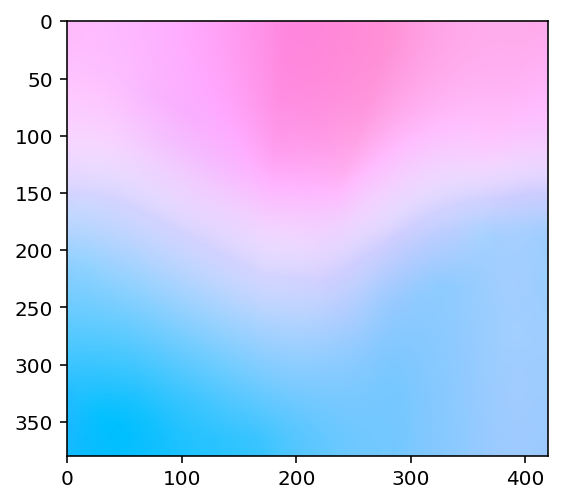

In [10]:
plt.imshow(img)